## The Dimensions

As you add more and more layers into your Network, juggling all of the matrix dimensions becomes an increasingly tedious task, *especially* when working out all of the gradients.

However, the following heuristics may prove useful:

- The weights matrix, `WN` and its partial `dWN` must have *the same dimensions*
- Same goes for the activation layers, `A`, and intermediate linear combinations, `Z`
- Working out the dimensions in advance gives you a good sanity check before you find yourself wrist-deep in `numpy`, trying to debug with `obj.shape`

The following image is an example of a deeper Net structure, and its corresponding dimensions.

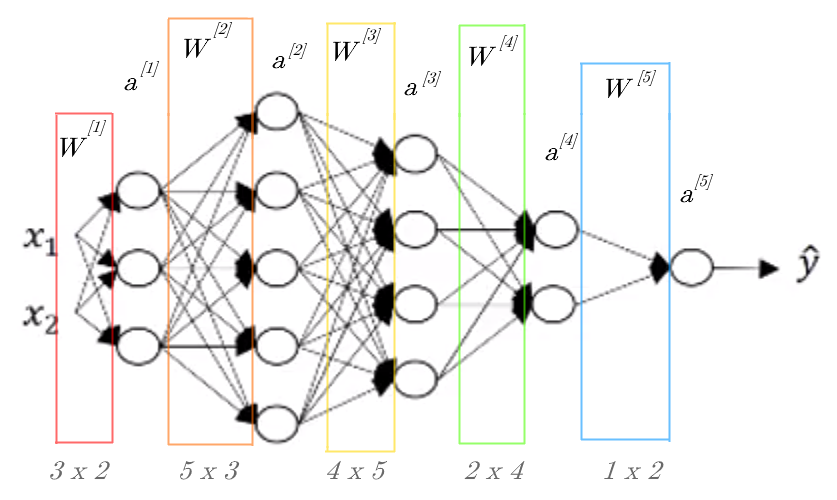

In [2]:
from IPython.display import Image

Image('images/deeper.PNG')

## Cache over Everything

When we calculate through backprop for a single layer, we use `da_l`, the derivative of that activation layer, to look for:

- The derivatives `dW_l` and `db_l` that we're going to use for gradient descent
- `da_l-1`, the derivative used as an input for the next layer 

First we calculate the derivative of the linear combination for that layer, `dZl`

$dZ^{[l]} = dA^{[l]} * g'^{[l]} (Z^{[l]})$

$dZ^{[l]} = W^{[l+1]T}dZ^{[l+1]} * g'^{[l]}(Z^{[l]})$

**Note**: we use both `W_l+1` and `Zl`

$dW^{[l]} = \frac{1}{m} dZ^{[l]}A^{[l-1]T}$

**Note:** we use `A_l-1`

$db^{[l]} = \frac{1}{m} \sum dZ^{[l]}$

$dA^{[l-1]} = W^{[l]T}dZ^{[l]}$

Suffice to say, caching the intermediate values of the activation layers during forward prop is extremely useful in helping calculate the backward steps.

One Layer:

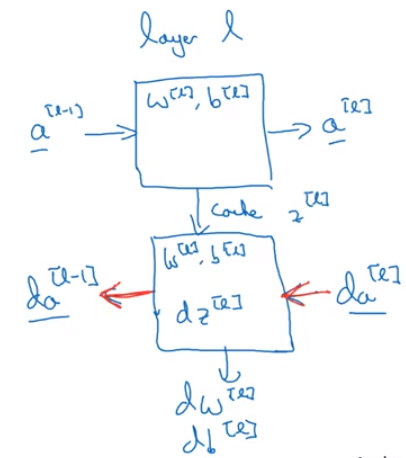

In [3]:
Image('images/forward_back_one_layer.PNG')

At Scale:

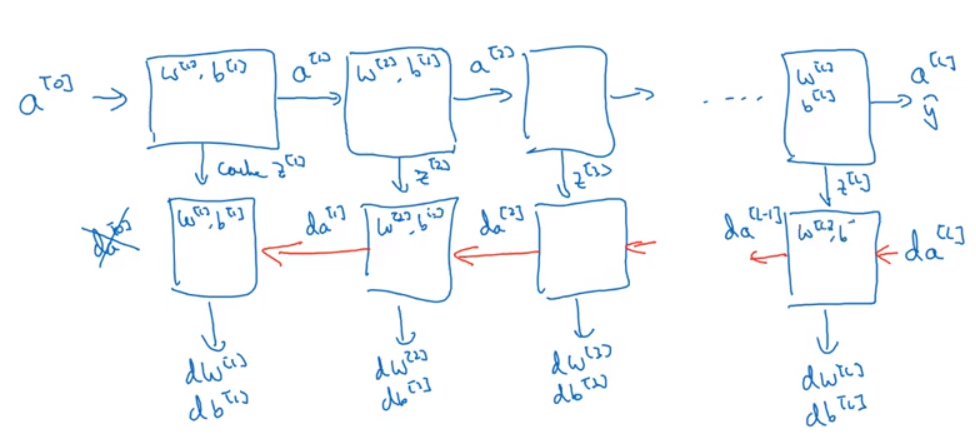

In [5]:
Image('images/forward_back_prop.PNG')